In [1]:
import numpy as np
import pandas as pd #importing pandas for data analysis and data processing
import matplotlib.pyplot as plt #importing matplotlib for data visualization and plotting graphs
%matplotlib inline
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 10,6
import seaborn as sns #importing seasborn for plots and visualizatons too
import warnings
warnings.filterwarnings('ignore') #filtering warninngs, to avoid printing out warnings from any cell output
import datetime #importing datetime library for time
from celluloid import Camera #for chart animations
from sklearn.preprocessing import StandardScaler #normalizing or scaling the dataset
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing #importing time series models

In [2]:
df = pd.read_csv('dc.csv')
df = df.rename(columns={'Unnamed: 0':'Time'}) #rename the first column from "Unnamed: 0" to "Time" using the rename function
df.head()

,Time,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


In [3]:
print("Dataset shape is: ",df.shape) #showing the size of the dataset in rows and column
df.tail()

Dataset shape is:  (1000, 10)


,Time,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
995,2018-05-11,33761.888384,9002.21,33816.606720,9016.80,31282.086400,8341.00,31503.360000,8400.00,48227
996,2018-05-10,34916.224000,9310.00,35235.458048,9395.12,33641.088000,8970.00,33761.850880,9002.20,25055
997,2018-05-09,34421.171200,9178.00,35216.256000,9390.00,33622.336000,8965.00,34916.224000,9310.00,25673
998,2018-05-08,35122.496000,9365.00,35537.665280,9475.70,33980.649216,9060.54,34457.025024,9187.56,25533
999,2018-05-07,36232.689408,9661.02,36340.138368,9689.67,34432.422400,9181.00,35122.496000,9365.00,33787


In [4]:
df.info() #printing all information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time       1000 non-null   object 
 1   open_SAR   1000 non-null   float64
 2   open_USD   1000 non-null   float64
 3   high_SAR   1000 non-null   float64
 4   high_USD   1000 non-null   float64
 5   low_SAR    1000 non-null   float64
 6   low_USD    1000 non-null   float64
 7   close_SAR  1000 non-null   float64
 8   close_USD  1000 non-null   float64
 9   volume     1000 non-null   int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 78.2+ KB


In [5]:
df = df[['Time', 'open_USD','low_USD','close_USD','volume']] #eliminating the SAR price column since we only care about the unit price in USD
df.head()

,Time,open_USD,low_USD,close_USD,volume
0,2021-01-30,34246.28,32825.00,34218.54,43072
1,2021-01-29,33368.18,31915.40,34252.20,231827
2,2021-01-28,30362.19,29842.10,33364.86,92621
3,2021-01-27,32464.01,29241.72,30366.15,95911
4,2021-01-26,32254.19,30837.37,32467.77,84972


In [6]:
df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True) #changing time column Dtype from object to datetime
indexed_df = df.set_index('Time') #setting time as the index column
indexed_df.head()

,open_USD,low_USD,close_USD,volume
Time,,,,
2021-01-30,34246.28,32825.00,34218.54,43072
2021-01-29,33368.18,31915.40,34252.20,231827
2021-01-28,30362.19,29842.10,33364.86,92621
2021-01-27,32464.01,29241.72,30366.15,95911
2021-01-26,32254.19,30837.37,32467.77,84972


Checking for anomalies, cleaning the data and Exploratory analysis

In [7]:
df.info() #there are no missing values in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       1000 non-null   datetime64[ns]
 1   open_USD   1000 non-null   float64       
 2   low_USD    1000 non-null   float64       
 3   close_USD  1000 non-null   float64       
 4   volume     1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 39.2 KB


In [8]:
duplicated = df[df.duplicated()] #to check for duplicated rows in the dataset
#duplicated.head()
#there are no duplicate rows
df.describe()

,open_USD,low_USD,close_USD,volume
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,9285.762120,9011.393200,9310.335850,53100.498000
std,5793.522832,5483.524463,5846.917681,35329.832031
min,3211.710000,3156.260000,3211.720000,5743.000000
25%,6467.192500,6325.015000,6466.762500,30045.750000
50%,8189.695000,8002.045000,8189.330000,43795.500000
75%,10216.860000,9907.977500,10220.170000,64909.250000
max,40586.960000,38720.000000,40582.810000,402201.000000


Shape of close_USD column greater than 20k (46, 5)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f623ed73c10>]],
      dtype=object)

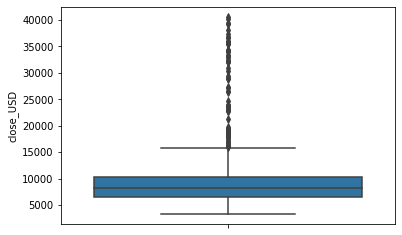

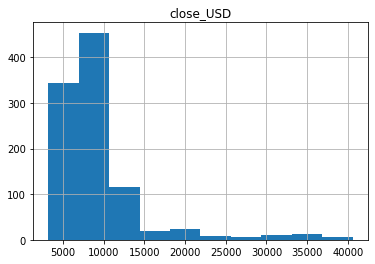

In [9]:
#checking for anomalies using seaborn boxplot and histogram chart on Close_USD column
sns.boxplot(y=df.close_USD, data=df)
print('Shape of close_USD column greater than 20k', df[df['close_USD']>20000].shape)
df.hist(column='close_USD')

Shape of Volume column greater than 25k (7, 5)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f623ec29ed0>]],
      dtype=object)

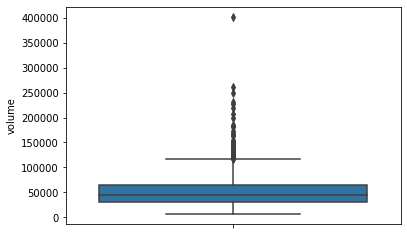

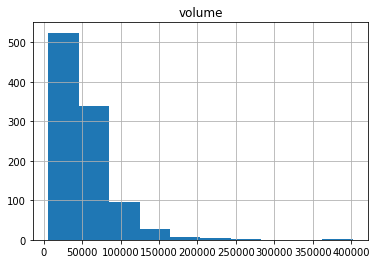

In [10]:
#checking for anomalies using seaborn boxplot and histogram chart on Volumn column
sns.boxplot(y=df.volume, data=df)
print('Shape of Volume column greater than 25k', df[df['volume']>200000].shape)
df.hist(column='volume')

checking for outliers or trying to treat them wouldn't be necessary since the only variable we need is the 'close_USD' column for the time series prediction.

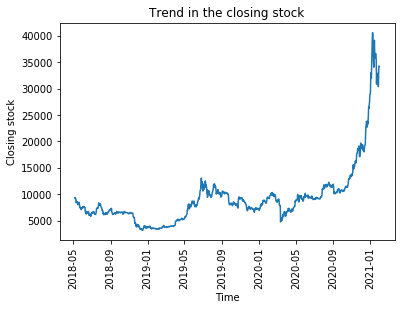

In [10]:
#visualizing trend in closing stock
plt.plot(df['Time'],df['close_USD'])
plt.title('Trend in the closing stock')
plt.xlabel('Time')
plt.ylabel('Closing stock')
plt.xticks(rotation='vertical')
plt.show()

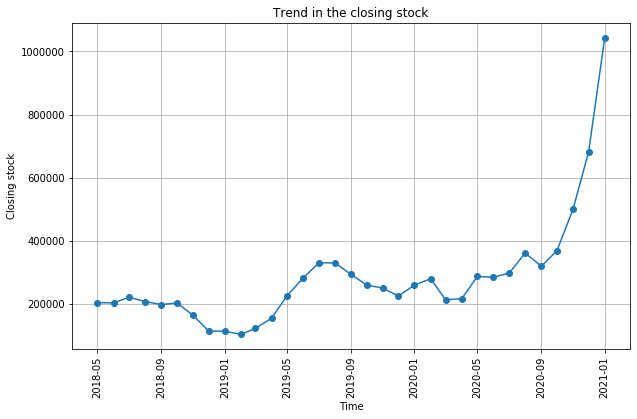

In [11]:
#creating a column for month and year and visualizing trend again

plt.figure(figsize=(10,6)) #setting the size for the plot chart
df['Month-year'] = df['Time'].apply(lambda x:x.strftime('%Y-%m')) #creating a new feature or column for month-year in the dataset from time column using the lamda function
df['Month-year'] = pd.to_datetime(df['Month-year']) #setting the month-year new feature datatype to datetime
df_one = df.groupby('Month-year').sum()['close_USD'].reset_index().sort_values('Month-year',ascending=True).reset_index(drop=True) #grouping Close_USD column by the mont-year column and taking the cummulative sum of each group
#Now we have a smaller dataset
#checking for trend again
plt.plot_date(df_one["Month-year"], df_one['close_USD'], linestyle ='solid') #plot_date function is instead of plot because it is used to plot data with dates
plt.title('Trend in the closing stock')
plt.xlabel('Time')
plt.ylabel('Closing stock')
plt.xticks(rotation='vertical')
plt.grid() #showing chart grid
plt.show()

In [15]:
print("New dataset shape:", df_one.shape)
print("Length of new dataset:", len(df_one))
df_one.head()

New dataset shape: (33, 2)
Length of new dataset: 33


,Month-year,close_USD
0,2018-05-01,203894.01
1,2018-06-01,203015.08
2,2018-07-01,220851.59
3,2018-08-01,206948.82
4,2018-09-01,197800.82


In [16]:
close_stock = []
Time_List = []
#making an array of values in Month-year and Close_USD columns of new dataset
Time_array = np.array(df_one['Month-year'])
closingStock_array = np.array(df_one['close_USD']) 
for i in range(len(df_one)):
    close_stock.append(closingStock_array[i])
    Time_List.append(Time_array[i])

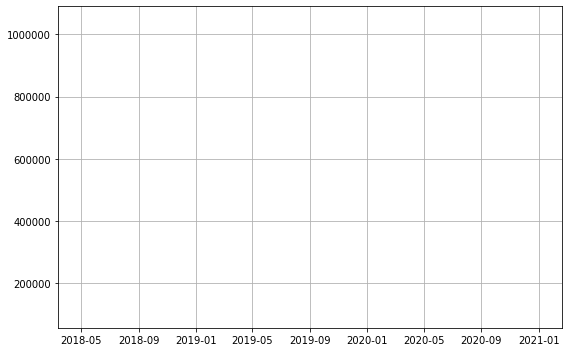

In [17]:
#animating trends in the closing stock
fig = plt.figure(figsize=(8,5)) #setting plot size
camera = Camera(fig) #creating an object of camera

for i in range(1, len(df_one)+1):
    x = Time_List[:i]
    y = close_stock[:i]
    plt.plot_date(x, y, linestyle = 'solid')
    plt.grid()
    plt.tight_layout()
    camera.snap() #taking a snap shot at every datapoint

animation = camera.animate()
from IPython.display import HTML
HTML(animation.to_html5_video())

In [19]:
#animation.save('animation.mp4')
dataset = df_one.rename(columns={'Month-year':'Time'})
dataset = dataset.set_index('Time')
print(dataset.shape)
dataset.head()
#plt.plot(dataset)

(33, 1)


,close_USD
Time,
2018-05-01,203894.01
2018-06-01,203015.08
2018-07-01,220851.59
2018-08-01,206948.82
2018-09-01,197800.82


plt.plot(dataset), this line is to check for stationarity of the data, and since we already know from the line charts above for Time and CloseUSD column that the data has a rising and falling trend and will however contain a varying mean, the data is therefore non-stationary

In [20]:
#Test to checking for stationarity using the rolling statistics method
rollmean = dataset.rolling(window=12).mean() #getting the rolling mean for a window of 12 months in a year for a monthly based time series dataset
rollstd = dataset.rolling(window=12).std() #getting the rolling standard deviation
print(rollmean, rollstd)

                close_USD
Time                     
2018-05-01            NaN
2018-06-01            NaN
2018-07-01            NaN
2018-08-01            NaN
2018-09-01            NaN
2018-10-01            NaN
2018-11-01            NaN
2018-12-01            NaN
2019-01-01            NaN
2019-02-01            NaN
2019-03-01            NaN
2019-04-01  167140.024167
2019-05-01  168971.111667
2019-06-01  175568.762500
2019-07-01  184661.755833
2019-08-01  194890.242500
2019-09-01  202850.555000
2019-10-01  207580.038333
2019-11-01  214760.675833
2019-12-01  223999.380833
2020-01-01  236229.563333
2020-02-01  250899.985833
2020-03-01  258448.631667
2020-04-01  263610.835833
2020-05-01  268695.533333
2020-06-01  268884.470833
2020-07-01  266166.682500
2020-08-01  268765.029167
2020-09-01  270925.566667
2020-10-01  280006.651667
2020-11-01  300815.770833
2020-12-01  338871.729167
2021-01-01  404150.974167                 close_USD
Time                     
2018-05-01            NaN
2018-06-01  

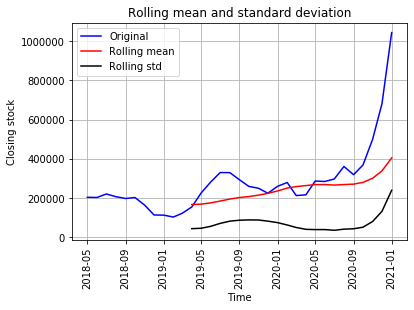

In [21]:
#Plotting the original data against rolling mean and standard deviation for visualization purpose
original_data = plt.plot(dataset, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling mean')
std = plt.plot(rollstd, color='black', label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.xlabel('Time')
plt.ylabel('Closing stock')
plt.xticks(rotation='vertical')
plt.grid()
plt.show(block=False)

In [22]:
#performing the augmented dickey fuller test to check for stationarity in the data too
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey Fuller Test')
dftest = adfuller(dataset['close_USD'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test statistics', 'p-value', '#Lags used', 'Number of Observation used'])
for key, value in dftest[4].items():
    dfoutput['critical value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test
Test statistics                2.547902
p-value                        0.999064
#Lags used                     4.000000
Number of Observation used    28.000000
critical value (1%)           -3.688926
critical value (5%)           -2.971989
critical value (10%)          -2.625296
dtype: float64


As shown above, the results of the Rolling statistics and ADCF test shows that the original data is non-stationary and inorder to apply timeseries to the dataset, it needs to be stationary, so the first goal now is to make the data stationary

Text(0.5, 0, 'Time')

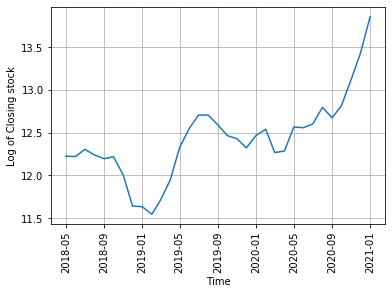

In [23]:
#taking the log of the entire data, see if it could become stationary
dataset_logscale = np.log(dataset) #taking the log scale
plt.plot(dataset_logscale)
plt.grid()
plt.xticks(rotation='vertical')
plt.ylabel('Log of Closing stock')
plt.xlabel('Time')

Text(0, 0.5, 'Log of Closing stock')

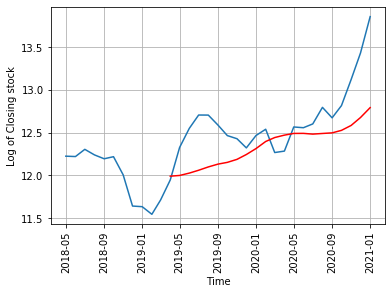

In [25]:
#plotting the moving average of the log scale dataset
movingAverage = dataset_logscale.rolling(window=12).mean()
movingSTD = dataset_logscale.rolling(window=12).std()
plt.plot(dataset_logscale)
plt.plot(movingAverage, color='red')
#plt.plot(movingSTD, color='black')
plt.xticks(rotation='vertical')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Log of Closing stock')

In [26]:
#function to test for stationarity, performing the rolling statistics test and dickey fuller test
def test_stationarity(timeseries):
    #Determining the moving average
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #plotting the rolling statistics
    original = plt.plot(timeseries, color='blue', label='original')
    mean = plt.plot(movingAverage, color='red', label='Rolling mean')
    std = plt.plot(movingSTD, color='black', label='Rolling STD')
    plt.legend(loc='best')
    plt.grid()
    plt.xticks(rotation='vertical')
    plt.title('Rolling Mean and Standard Deviation')
    plt.xlabel('Time')
    plt.ylabel('Transformed Closing stock')
    plt.show(block=False)
    
    #performing dickey fuller test
    print('Results for Dickey Fuller test:')
    dftest = adfuller(timeseries['close_USD'], autolag='AIC')
    dfoutput= pd.Series(dftest[0:4], index=['Test statistics', 'p-value', '#Lags used', 'Number of Obsrvation used'])
    for key, value in dftest[4].items():
        dfoutput['critical value (%s)'%key] = value
    print(dfoutput)

In [27]:
#subtracting the dataset moving average from the dataset logscale and see if could generate a stationary dataset
new_dataset = dataset_logscale - movingAverage

new_dataset.dropna(inplace=True)
print(new_dataset.shape)
new_dataset.head()

(22, 1)


,close_USD
Time,
2019-04-01,-0.043911
2019-05-01,0.327848
2019-06-01,0.523030
2019-07-01,0.645996
2019-08-01,0.606350


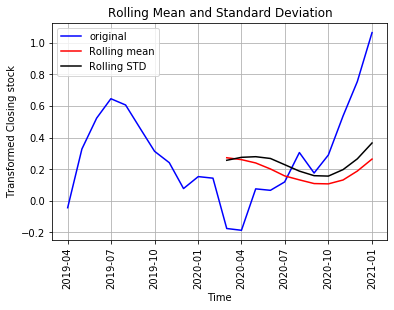

Results for Dickey Fuller test:
Test statistics              -0.201456
p-value                       0.938348
#Lags used                    9.000000
Number of Obsrvation used    12.000000
critical value (1%)          -4.137829
critical value (5%)          -3.154972
critical value (10%)         -2.714477
dtype: float64


In [31]:
#testing for stationarity on the new dataset using the test_stationarity function above which contains both the rolling statistics and the ADCF test for stationarity
test_stationarity(new_dataset)

In [32]:
#transforming dataset using square root
dataset_sqrt = np.sqrt(dataset)
dataset_sqrt.head()

,close_USD
Time,
2018-05-01,451.546243
2018-06-01,450.571948
2018-07-01,469.948497
2018-08-01,454.916278
2018-09-01,444.748041


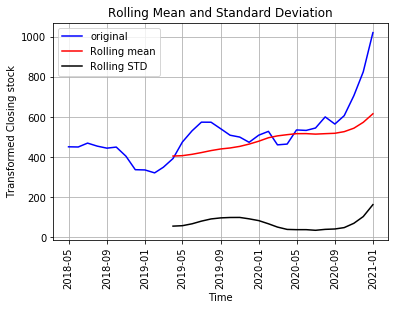

Results for Dickey Fuller test:
Test statistics               1.584075
p-value                       0.997809
#Lags used                    4.000000
Number of Obsrvation used    28.000000
critical value (1%)          -3.688926
critical value (5%)          -2.971989
critical value (10%)         -2.625296
dtype: float64


In [33]:
test_stationarity(dataset_sqrt)

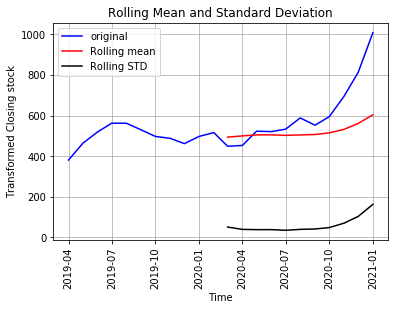

Results for Dickey Fuller test:
Test statistics               1.510893
p-value                       0.997564
#Lags used                    9.000000
Number of Obsrvation used    12.000000
critical value (1%)          -4.137829
critical value (5%)          -3.154972
critical value (10%)         -2.714477
dtype: float64


In [34]:
#square root transformed dataset minus moving average
dataset_sqrtMinusMovingAverage = dataset_sqrt - movingAverage
dataset_sqrtMinusMovingAverage.dropna(inplace=True)
test_stationarity(dataset_sqrtMinusMovingAverage)

In [35]:
#transforming dataset using  cube root
dataset_cuberoot = np.power(dataset, 1/3)

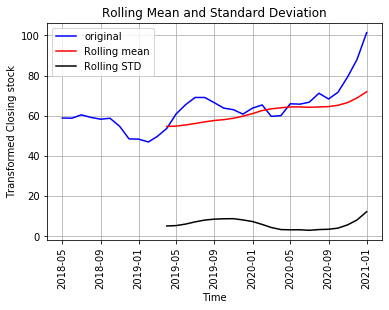

Results for Dickey Fuller test:
Test statistics               1.208806
p-value                       0.996046
#Lags used                    4.000000
Number of Obsrvation used    28.000000
critical value (1%)          -3.688926
critical value (5%)          -2.971989
critical value (10%)         -2.625296
dtype: float64


In [36]:
test_stationarity(dataset_cuberoot)

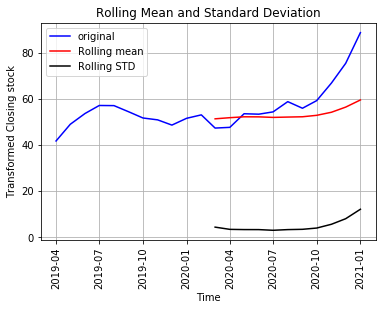

Results for Dickey Fuller test:
Test statistics               1.366130
p-value                       0.996955
#Lags used                    9.000000
Number of Obsrvation used    12.000000
critical value (1%)          -4.137829
critical value (5%)          -3.154972
critical value (10%)         -2.714477
dtype: float64


In [37]:
#cube root transformed dataset minus moving average
dataset_cuberootMinusMovingAverage = dataset_cuberoot - movingAverage
dataset_cuberootMinusMovingAverage.dropna(inplace=True)
test_stationarity(dataset_cuberootMinusMovingAverage)

In [38]:
#scaling the original non stationary dataset
sc = StandardScaler()
dataset_transformed = sc.fit_transform(dataset)
dataset_transformed = pd.DataFrame(dataset_transformed, columns=['close_USD'])

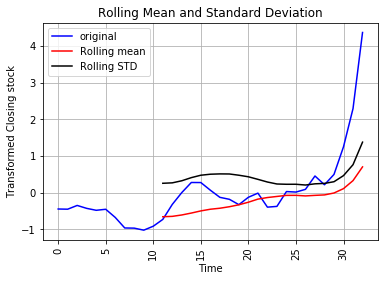

Results for Dickey Fuller test:
Test statistics               2.547902
p-value                       0.999064
#Lags used                    4.000000
Number of Obsrvation used    28.000000
critical value (1%)          -3.688926
critical value (5%)          -2.971989
critical value (10%)         -2.625296
dtype: float64


In [39]:
test_stationarity(dataset_transformed)

In [40]:
#transformation using the differencing and seasonal differencing technique
dataset_differencing = dataset - dataset.shift(1)
dataset_differencing.dropna(inplace=True)

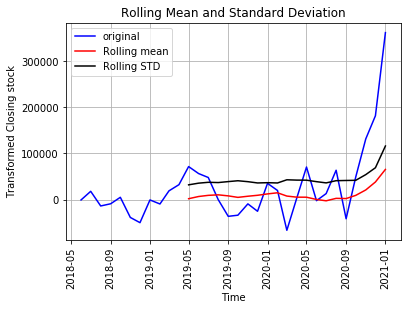

Results for Dickey Fuller test:
Test statistics               0.590856
p-value                       0.987388
#Lags used                    4.000000
Number of Obsrvation used    27.000000
critical value (1%)          -3.699608
critical value (5%)          -2.976430
critical value (10%)         -2.627601
dtype: float64


In [41]:
test_stationarity(dataset_differencing)

So no matter what techniques that I have now used to transform the dataset in order to make it stationary, the dataset still remained the same, so in my opinion, maybe checking for anomalies or outliers in the original and treating them would solve this problem.

In [42]:
#print(np.percentile(df.close_USD,[99])[0])
df_one.close_USD.describe().astype(int)

count         33
mean      282131
std       177074
min       103324
25%       203015
50%       250044
75%       297354
max      1043056
Name: close_USD, dtype: int64

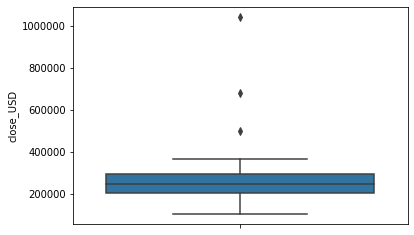

In [43]:
sns.boxplot(y=df_one.close_USD, data=df_one)

In [44]:
print(df_one.shape)
print(df_one[df_one['close_USD']>400000].shape)

#now deleting the outliers now and making a new dataset out of it
df_one = df_one[df_one.close_USD<400000]
print('New dataset shape', df_one.shape)
df_one.head()

(33, 2)
(3, 2)
New dataset shape (30, 2)


,Month-year,close_USD
0,2018-05-01,203894.01
1,2018-06-01,203015.08
2,2018-07-01,220851.59
3,2018-08-01,206948.82
4,2018-09-01,197800.82


In [45]:
Final_dataset = df_one.rename(columns={'Month-year':'Time'})
Final_dataset = Final_dataset.set_index('Time')

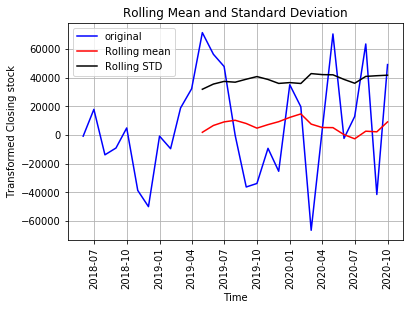

Results for Dickey Fuller test:
Test statistics              -2.979230
p-value                       0.036880
#Lags used                    6.000000
Number of Obsrvation used    22.000000
critical value (1%)          -3.769733
critical value (5%)          -3.005426
critical value (10%)         -2.642501
dtype: float64


In [46]:
#Now transformation the new dataset using the differencing and seasonal differencing technique
new_dataset_differencing = Final_dataset - Final_dataset.shift(1)
new_dataset_differencing.dropna(inplace=True)
test_stationarity(new_dataset_differencing)

Now the dataset is stationary and the problem before was that the dataset contained outlier

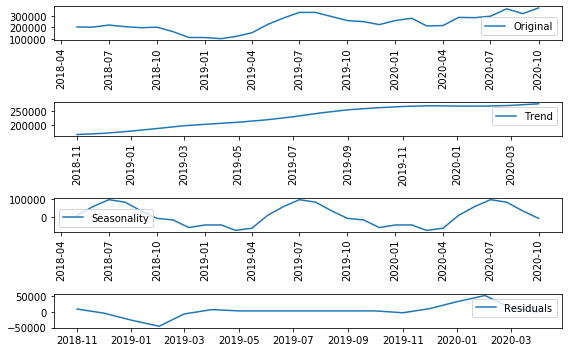

In [47]:
#visualizing the trend, seasonality and residuals
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Final_dataset)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(8,5))

plt.subplot(4,1,1)
plt.plot(Final_dataset, label='Original')
plt.xticks(rotation='vertical')
plt.legend(loc='best')
plt.subplot(4,1,2)
plt.plot(trend, label='Trend')
plt.xticks(rotation='vertical')
plt.legend(loc='best')
plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonality')
plt.xticks(rotation='vertical')
plt.legend(loc='best')
plt.subplot(4,1,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedFinalData = residual
decomposedFinalData.dropna(inplace=True)
#decomposedFinalData = pd.DataFrame({'close_USD':decomposedFinalData.values})
#test_stationarity(decomposedFinalData)

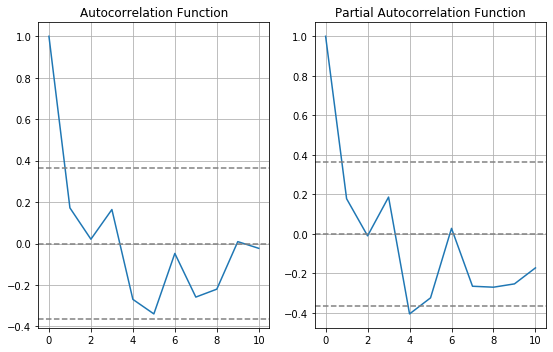

In [48]:
#plotting acf and pacf for predicting values of q and p respectively
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(new_dataset_differencing, nlags=10)
lag_pacf = pacf(new_dataset_differencing, nlags=10)
plt.figure(figsize=(8,5))
#plot acf:
plt.subplot(1,2,1)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_dataset_differencing)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_dataset_differencing)), linestyle='--',color='gray')
plt.grid()
plt.title('Autocorrelation Function')

#plot pacf:
plt.subplot(1,2,2)
plt.subplots_adjust(wspace=0.8)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new_dataset_differencing)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(new_dataset_differencing)), linestyle='--',color='gray')
plt.grid()
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

The both ACF and PACF graphs above seem a little bit confusing to read the value of Q and P. so instead of the statsmodels acf and pacf I'd use a different technique to probably make it easier, whichever way. Although for the plots the values of P and Q could possibly be 1 and 1 respectively 8 on a scale of 10

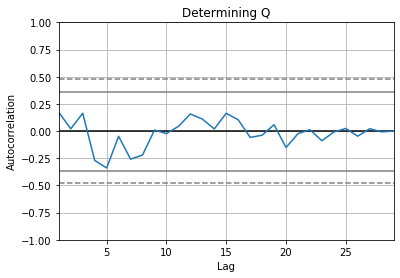

In [49]:
#plotting acf using autocorrelation_plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(new_dataset_differencing)
plt.title('Determining Q')
plt.show()

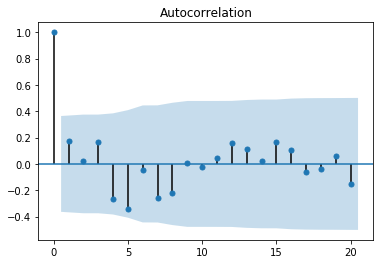

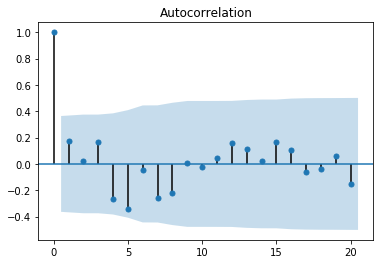

In [50]:
#another method for plotting acf or determing q value
#plotting acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(new_dataset_differencing, lags=20)

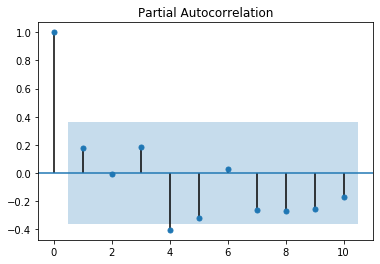

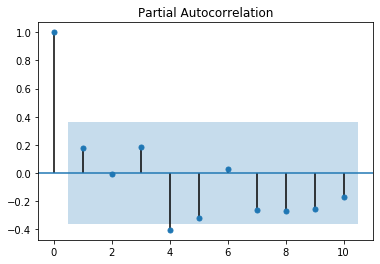

In [51]:
#plotting pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(new_dataset_differencing, lags=10)

From the plotting above now, The value of Q equals 2 and the value of P equals 1 for the ACF and PACF plotting respectively

/home/bluearc/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bluearc/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plottng AR model


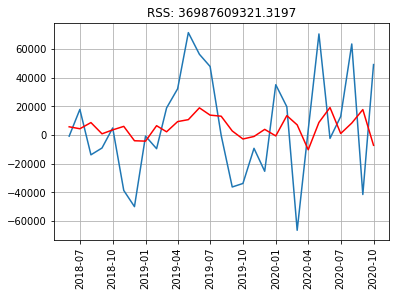

In [52]:
#performing the ARIMA model now
from statsmodels.tsa.arima_model import ARIMA

#AR model
model = ARIMA(Final_dataset, order=(0,1,1))
results_AR = model.fit(disp=-1)
plt.plot(new_dataset_differencing)
plt.plot(results_AR.fittedvalues, color='red')
plt.xticks(rotation='vertical')
plt.grid()
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-new_dataset_differencing['close_USD'])**2))
print('Plottng AR model')

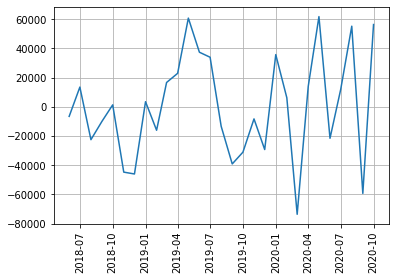

In [53]:
#checking authenticity of model  #No trend in the residuals plotting
resids = pd.DataFrame(results_AR.resid)
plt.plot(resids)
plt.xticks(rotation='vertical')
plt.grid()

/home/bluearc/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bluearc/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting MA model


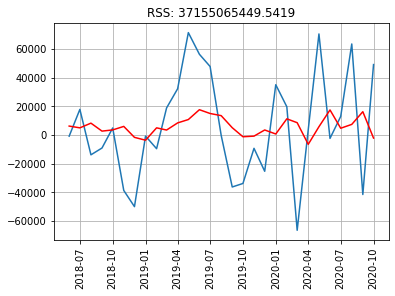

In [54]:
#MA model
model_MA = ARIMA(Final_dataset, order=(1,1,0))
results_MA = model_MA.fit(disp=-1)
plt.plot(new_dataset_differencing)
plt.plot(results_MA.fittedvalues, color='red')
plt.xticks(rotation='vertical')
plt.grid()
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-new_dataset_differencing['close_USD'])**2))
print('Plotting MA model')

In [55]:
# from statsmodels.tsa.arima_model import ARIMA

# final_model = ARIMA(Final_dataset, order=(1,1,1))
# final_results = final_model.fit(disp=-1)
# plt.plot(new_dataset_differencing)
# plt.plot(final_results.fittedvalues, color='red')
# plt.xticks(rotation='vertical')
# plt.grid()
# plt.title('RSS: %.4f'%sum((final_results.fittedvalues-new_dataset_differencing['close_USD'])**2))

So up to this point,I have used the ACF and PACF plottings to try to determine the order values of p, d and q and trials and error included too in order to fit the ARIMA model but it turns out that performance of the model is really poor based on the estmated RSS values for the AR and MA plots. The RSS value for the final ARIMA model as shown in the above plot is estimated to over 3.5x10^10 and actually research hsa it that the lower the RSS value the better the model and here the RSS value is extremely large and hence not usable. In essence, I'm going to resort to Auto ARIMA model for this time series on the original preprocessed data.

AUTO ARIMA MODEL

In [56]:
#the preprocessed dataset - non-stattionary
print(Final_dataset.shape)
Final_dataset.head()

(30, 1)


,close_USD
Time,
2018-05-01,203894.01
2018-06-01,203015.08
2018-07-01,220851.59
2018-08-01,206948.82
2018-09-01,197800.82


Text(0, 0.5, 'Closing stock')

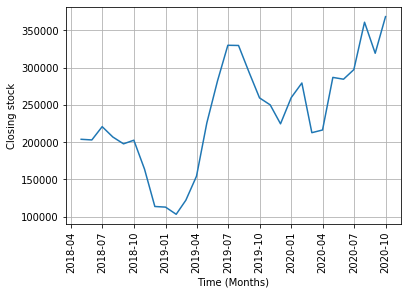

In [57]:
plt.plot(Final_dataset)
plt.grid()
plt.xticks(rotation='vertical')
plt.xlabel('Time (Months)')
plt.ylabel('Closing stock')

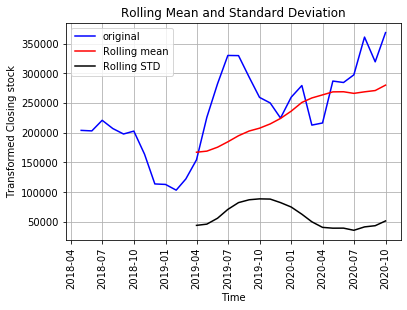

Results for Dickey Fuller test:
Test statistics              -0.775849
p-value                       0.826114
#Lags used                    0.000000
Number of Obsrvation used    29.000000
critical value (1%)          -3.679060
critical value (5%)          -2.967882
critical value (10%)         -2.623158
dtype: float64


In [58]:
#testing for stationarity
test_stationarity(Final_dataset)

Dataset is non-stationary, How?. This is the ADF test. I've been using this test to determine stationarity through out this project so I'll just explain it here. Augmented Dickey Fuller test. The test results comprise of a test statistics and some critical values. If the test statistics is less than some critical values and if the p-values is reasonably very low say below 0.05, then we can reject the null hypothesis and say that Data is stationary.

shape of train data:  (20, 1)
shape of test data:  (10, 1)


(array([736785., 736876., 736968., 737060., 737150., 737241., 737333.,
        737425., 737516., 737607., 737699.]),
 <a list of 11 Text xticklabel objects>)

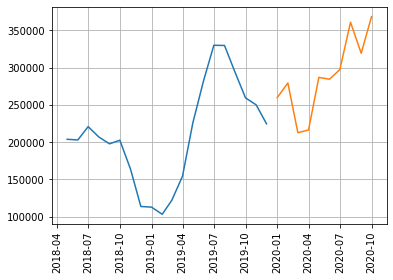

In [50]:
#Train test split
train_data = Final_dataset[:20]
test_data = Final_dataset[-10:]
print('shape of train data: ',train_data.shape)
print('shape of test data: ',test_data.shape)
plt.plot(train_data)
plt.plot(test_data)
plt.grid()
plt.xticks(rotation='vertical')

In [51]:
from pmdarima.arima import auto_arima

In [52]:
arima_model = auto_arima(train_data, start_p=0, d=0, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0,
                        D=0, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, seasonal=True, stationary=False, 
                        information_criterion='bic', test='adf', trace=True, random=False, random_state=20, n_iter=50)

Performing stepwise search to minimize bic
 ARIMA(0,0,0)(0,0,0)[12] intercept   : BIC=507.025, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : BIC=482.949, Time=0.06 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : BIC=503.819, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : BIC=551.873, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : BIC=480.517, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : BIC=483.017, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : BIC=485.934, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : BIC=467.793, Time=0.04 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : BIC=470.784, Time=0.15 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : BIC=470.766, Time=0.11 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : BIC=473.753, Time=0.17 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : BIC=470.441, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : BIC=470.550, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : BIC=476.732, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[12] intercep

In [53]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -227.905
Date:                Mon, 02 Aug 2021   AIC                            463.810
Time:                        10:00:45   BIC                            467.793
Sample:                             0   HQIC                           464.588
                                 - 20                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.177e+04   1.84e+04      2.273      0.023    5752.116    7.78e+04
ar.L1          1.5059      0.165      9.124      0.000       1.182       1.829
ar.L2         -0.7089      0.159     -4.454      0.000      -1.021      -0.397
sigma2      4.375e+08      0.205   2.13e+09      0.000    4.38e+08    4.38e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.93   Prob(JB):                         0.80
Heteroskedasticity (H):               0.60   Skew:                            -0.32
Prob(H) (two-sided):                  0.52   Kurtosis:                         2.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.77e+28. Standard errors may be unstable.
"""

In [54]:
prediction = pd.DataFrame(arima_model.predict(n_periods=10),index=test_data.index)
prediction.columns = ['Predicted Close_USD']
prediction

,Predicted Close_USD
Time,
2020-01-01,202814.650948
2020-02-01,187946.184662
2020-03-01,181030.076471
2020-04-01,181154.917811
2020-05-01,186245.680218
2020-06-01,193823.577956
2020-07-01,201626.668234
2020-08-01,208005.780724
2020-09-01,212080.827566


<function matplotlib.pyplot.show(*args, **kw)>

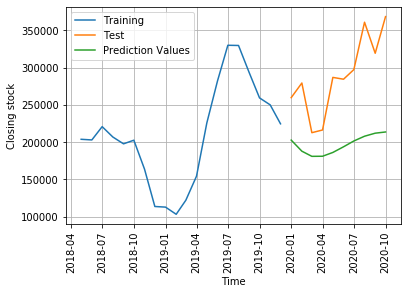

In [55]:
plt.plot(train_data, label='Training')
plt.plot(test_data, label='Test')
plt.plot(prediction, label='Prediction Values')
plt.legend(loc='left corner')
plt.grid()
plt.xticks(rotation='vertical')
plt.xlabel('Time')
plt.ylabel('Closing stock')
plt.show

In [56]:
#evaluation metric
from sklearn.metrics import r2_score
test_data['Predicted Close_USD'] = prediction
r2_score(test_data['close_USD'], test_data['Predicted Close_USD'])

-3.084215576715029

Trying on a stationary dataset

In [57]:
new_dataset_differencing.shape

(29, 1)

shape of train data:  (20, 1)
shape of test data:  (9, 1)


(array([736876., 736968., 737060., 737150., 737241., 737333., 737425.,
        737516., 737607., 737699.]), <a list of 10 Text xticklabel objects>)

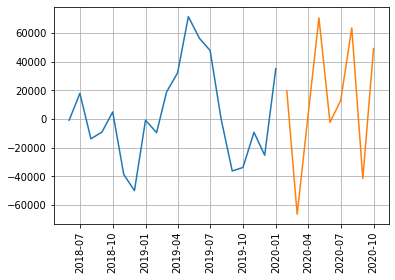

In [58]:
new_train = new_dataset_differencing[:20]
new_test = new_dataset_differencing[-9:]
print('shape of train data: ',new_train.shape)
print('shape of test data: ',new_test.shape)
plt.plot(new_train)
plt.plot(new_test)
plt.grid()
plt.xticks(rotation='vertical')

In [59]:
new_arima_model = auto_arima(new_train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, information_criterion='hqic', test='adf', 
                        seasonal=True, trace=True, stepwise=True, random_state=20, n_iter=50)

Performing stepwise search to minimize hqic
 ARIMA(0,1,0)(0,1,0)[12]             : HQIC=167.277, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : HQIC=168.214, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[12]             : HQIC=169.026, Time=0.07 sec
 ARIMA(0,1,0)(1,1,0)[12]             : HQIC=167.038, Time=0.10 sec
 ARIMA(0,1,0)(2,1,0)[12]             : HQIC=168.369, Time=0.19 sec
 ARIMA(0,1,0)(1,1,1)[12]             : HQIC=168.280, Time=0.15 sec
 ARIMA(0,1,0)(0,1,1)[12]             : HQIC=166.983, Time=0.07 sec
 ARIMA(0,1,0)(0,1,2)[12]             : HQIC=168.277, Time=0.17 sec
 ARIMA(0,1,0)(1,1,2)[12]             : HQIC=169.608, Time=0.17 sec
 ARIMA(1,1,0)(0,1,1)[12]             : HQIC=168.321, Time=0.13 sec
 ARIMA(1,1,1)(0,1,1)[12]             : HQIC=169.858, Time=0.08 sec
 ARIMA(0,1,0)(0,1,1)[12] intercept   : HQIC=168.390, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,1,1)[12]          
Total fit time: 1.346 seconds


In [60]:
prediction = pd.DataFrame(new_arima_model.predict(n_periods=9),index=new_test.index)
prediction.columns = ['Predicted Close_USD']
prediction

,Predicted Close_USD
Time,
2020-02-01,29875.389065
2020-03-01,46682.319386
2020-04-01,54596.748499
2020-05-01,77744.171326
2020-06-01,69808.479604
2020-07-01,70918.260342
2020-08-01,37300.288534
2020-09-01,20369.366396
2020-10-01,25688.067550


<function matplotlib.pyplot.show(*args, **kw)>

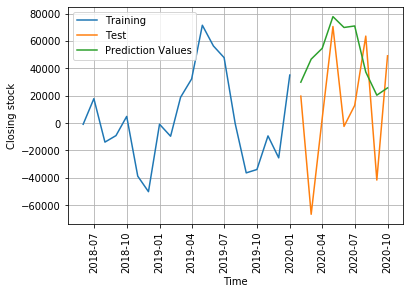

In [61]:
plt.plot(new_train, label='Training')
plt.plot(new_test, label='Test')
plt.plot(prediction, label='Prediction Values')
plt.legend(loc='left corner')
plt.grid()
plt.xticks(rotation='vertical')
plt.xlabel('Time')
plt.ylabel('Closing stock')
plt.show

In [62]:
#testing performance using r2 evaluation metrics
from sklearn.metrics import r2_score
new_test['Predicted Close_USD'] = prediction
r2_score(new_test['close_USD'], new_test['Predicted Close_USD'])

-0.7361812005108763

In [63]:
#comparing actual values and predicted values of the validation set
array = [[a,b] for a,b in zip(new_test['close_USD'], new_test['Predicted Close_USD'])]

In [64]:
array

[[19664.1099999999, 29875.389064771058],
 [-66616.60999999993, 46682.31938582514],
 [3610.9400000000314, 54596.748498714995],
 [70519.61999999997, 77744.17132626765],
 [-2429.2900000000373, 69808.47960351847],
 [12899.910000000033, 70918.26034152367],
 [63516.7699999999, 37300.288533891086],
 [-41619.79999999999, 20369.36639552378],
 [49134.520000000135, 25688.067549971845]]

Trying other time series models from here

(array([588, 600]), <a list of 2 Text xticklabel objects>)

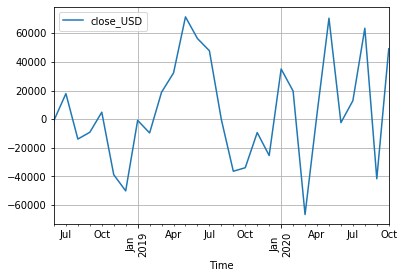

In [65]:
new_dataset_differencing.plot()
plt.grid()
plt.xticks(rotation='vertical')

In [66]:
Final_dataset['Forecast'] = ExponentialSmoothing(Final_dataset['close_USD'], trend='multiplicative', damped=False, seasonal=None, seasonal_periods=12).fit().fittedvalues
# es_fit = es_model.forecast(steps=len(new_test))
# es_fit = pd.DataFrame(es_fit).set_index(new_test.index)

/home/bluearc/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bluearc/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


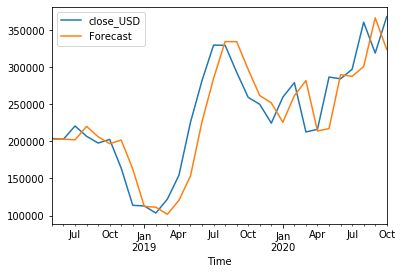

In [68]:
# plt.plot(new_train, label='Train')
# plt.plot(new_test, label='Test')
# plt.plot(es_fit, label='Forecast')
# plt.legend(loc='best')
# plt.grid()
# plt.xticks(rotation='vertical')
# plt.show()
Final_dataset[['close_USD', 'Forecast']].plot()

In [69]:
new_dataset_differencing['close_USD_sqr'] = new_dataset_differencing['close_USD']**2
new_dataset_differencing['close_USD_sqr'] = new_dataset_differencing['close_USD_sqr'].astype('int64')

In [70]:
new_dataset_differencing = new_dataset_differencing.drop('close_USD', axis=1)
new_dataset_differencing = new_dataset_differencing.rename(columns={'close_USD_sqr':'close_USD'})
new_dataset_differencing.head()

,close_USD
Time,
2018-06-01,772517
2018-07-01,318141088
2018-08-01,193287013
2018-09-01,83685904
2018-10-01,23599192


In [71]:
#using auto arima again
train = new_dataset_differencing[:20]
test = new_dataset_differencing[-9:]

new_model = auto_arima(train, start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5, start_P=0,
                        D=1, start_Q=0, max_P=5, max_D=5, max_Q=5, m=12, information_criterion='hqic', test='adf', 
                        seasonal=False, trace=True, stepwise=True, random_state=20, n_iter=50)

Performing stepwise search to minimize hqic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : HQIC=859.830, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : HQIC=861.599, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : HQIC=861.188, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : HQIC=857.733, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : HQIC=861.334, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.119 seconds


In [72]:
Forecast = pd.DataFrame(new_model.predict(n_periods=9),index=test.index)
Forecast.columns = ['Forecast Close_USD']
Forecast

,Forecast Close_USD
Time,
2020-02-01,1.229265e+09
2020-03-01,1.229265e+09
2020-04-01,1.229265e+09
2020-05-01,1.229265e+09
2020-06-01,1.229265e+09
2020-07-01,1.229265e+09
2020-08-01,1.229265e+09
2020-09-01,1.229265e+09
2020-10-01,1.229265e+09


Arima model not looking so good AGAIN. So it turns out that the arima model may not be able to produce the required results even with the "auto_arima" due to the fact that the original dataset has no seasonality or trend. Even though the dataset can be made stationary, it still wouldn't be able to produce the required results. In the case, other timeseries techniques such as Holt's winter exponential smoothing as shown above or simple exponential smoothing on the original dataset may be the Last resort

/home/bluearc/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bluearc/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


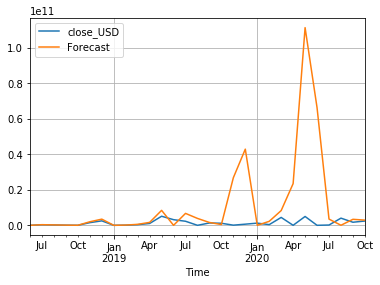

In [73]:
#Arima model above not looking so good. Again, Trying exponential smoothing on stationary dataset

new_dataset_differencing['Forecast'] = ExponentialSmoothing(new_dataset_differencing['close_USD'], trend='add', damped=False, seasonal='mul', seasonal_periods=12).fit().fittedvalues
new_dataset_differencing[['close_USD', 'Forecast']].plot()
plt.grid()

/home/bluearc/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bluearc/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


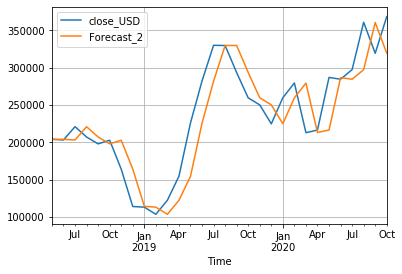

In [74]:
#Trying simple exponential technique on original dataset

Final_dataset['Forecast_2'] = SimpleExpSmoothing(Final_dataset['close_USD']).fit().fittedvalues
Final_dataset[['close_USD', 'Forecast_2']].plot()
plt.grid()

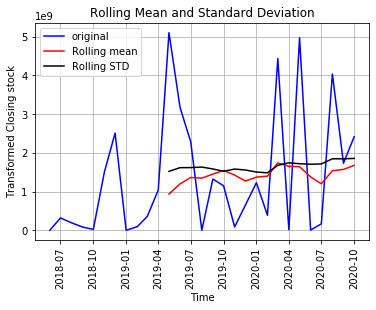

Results for Dickey Fuller test:
Test statistics              -5.272167
p-value                       0.000006
#Lags used                    0.000000
Number of Obsrvation used    28.000000
critical value (1%)          -3.688926
critical value (5%)          -2.971989
critical value (10%)         -2.625296
dtype: float64


In [79]:
#showing the stationary dataset again

data = new_dataset_differencing['close_USD']
data = pd.DataFrame(data)
data.head()
test_stationarity(data)

In [90]:
#The last resort: Simple Exponential smoothing

Final_model = SimpleExpSmoothing(Final_dataset['close_USD']).fit()

/home/bluearc/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/bluearc/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [84]:
Forecast_dates = pd.date_range('2020-11-01','2021-11-01',freq='MS').strftime("%Y-%m").tolist()

In [87]:
Forecast_dates = pd.to_datetime(Forecast_dates, infer_datetime_format=True)

In [94]:
#Future Prediction

Future_prediction = pd.DataFrame(Final_model.forecast(steps=156),index=Forecast_dates)
Future_prediction.columns = ['Forecast Close_USD']
Future_prediction

,Forecast Close_USD
2020-11-01,368140.899947
2020-12-01,368140.899947
2021-01-01,368140.899947
2021-02-01,368140.899947
2021-03-01,368140.899947
2021-04-01,368140.899947
2021-05-01,368140.899947
2021-06-01,368140.899947
2021-07-01,368140.899947
2021-08-01,368140.899947


Now we have the predictions from November 2020 to November 2021.
The issues with this forecast?
1. Now this project was done at exactly the time of this repo posting; August 2021. And before this time, prices of BTC are already known from this November 2020 till August here and however the predicted prices is not reflecting the real prices of these times from reseach that was made
2. The prediction produces the same values for different times in the Simple Exponential technique. The same applies to Auto-Arima technique and the Holt's winters Exponential smoothing

In essence, I'm going to be halting this project here till further notice. Updates will be made on it when I finally discover a better solution for this. Or a reason why the predicted results has to be this way

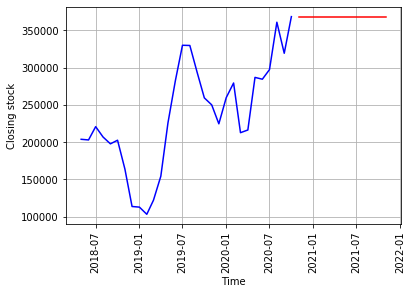

In [95]:
plt.plot(Final_dataset['close_USD'], color='blue', label='close_USD')
plt.plot(Future_prediction['Forecast Close_USD'], color='red', label='Forecast')
plt.grid()
plt.xticks(rotation='vertical')
plt.xlabel('Time')
plt.ylabel('Closing stock')
plt.show()